# Proyek Analis Data : Bike-sharing-dataset.zip

# Menentukan Pertanyaan Bisnis
- Bagaimana pengaruh musim terhadap total penyewaan sepeda, dan musim apa yang memiliki penyewaan tertinggi serta terendah?
- Bagaimana perbedaan pola penyewaan sepeda pada hari kerja dibandingkan hari libur, dan jenis pengguna mana yang mendominasi pada masing-masing hari tersebut?

# Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings("ignore")

# Data Wrangling

Gathering Data


In [2]:
data_day = pd.read_csv("Dataset/day.csv")
data_hour = pd.read_csv("Dataset/hour.csv")
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight :
- Data yang digunakan berasal dari dataset bike-sharing yang mencakup informasi mengenai penyewaan sepeda harian(day) dan per jam(hour).

- Dataset mencakup kolom-kolom penting seperti dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered dan cnt

# Data Assessing

In [4]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print(f"jumlah baris :{data_day.shape[0]}")
print(f"jumlah kolom :{data_day.shape[1]}")

jumlah baris :731
jumlah kolom :16


In [6]:
print("Data Null :",data_day.isna().sum())

Data Null : instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
print("Duplikasi: ", data_day.duplicated().sum())

Duplikasi:  0


In [8]:
data_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [9]:
data_day.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print(f"jumlah baris :{data_hour.shape[0]}")
print(f"jumlah kolom :{data_hour.shape[1]}")

jumlah baris :17379
jumlah kolom :17


In [12]:
print("Data Null :",data_hour.isna().sum())

Data Null : instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [13]:
print("Duplikasi :", data_hour.duplicated().sum())

Duplikasi : 0


In [14]:
data_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [15]:
data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight :
- Analisis awal dengan memeriksa informasi dasar mengenai jumlah baris, kolom, dan tipe data. Dataset day memiliki 731 baris dengan 16 kolom, sedangkan dataset hour memiliki 17379 entri dengan 17 kolom.

- Hasil analisis menunjukkan bahwa tidak ada nilai null dan duplikasi dalam dataset, yang menunjukkan bahwa data siap untuk analisis lebih lanjut.


# Data Cleaning

In [16]:
#Mengubah kolom dteday yg bertipe object di 2 data ke tipe datetime
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_hour['dteday'] = pd.to_datetime(data_hour['dteday'])

data_day.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Insight :
- Data dibersihkan dengan mengkonversi kolom 'dteday' menjadi format datetime

# Exploratory Data Analysis (EDA)


<Figure size 1500x1000 with 0 Axes>

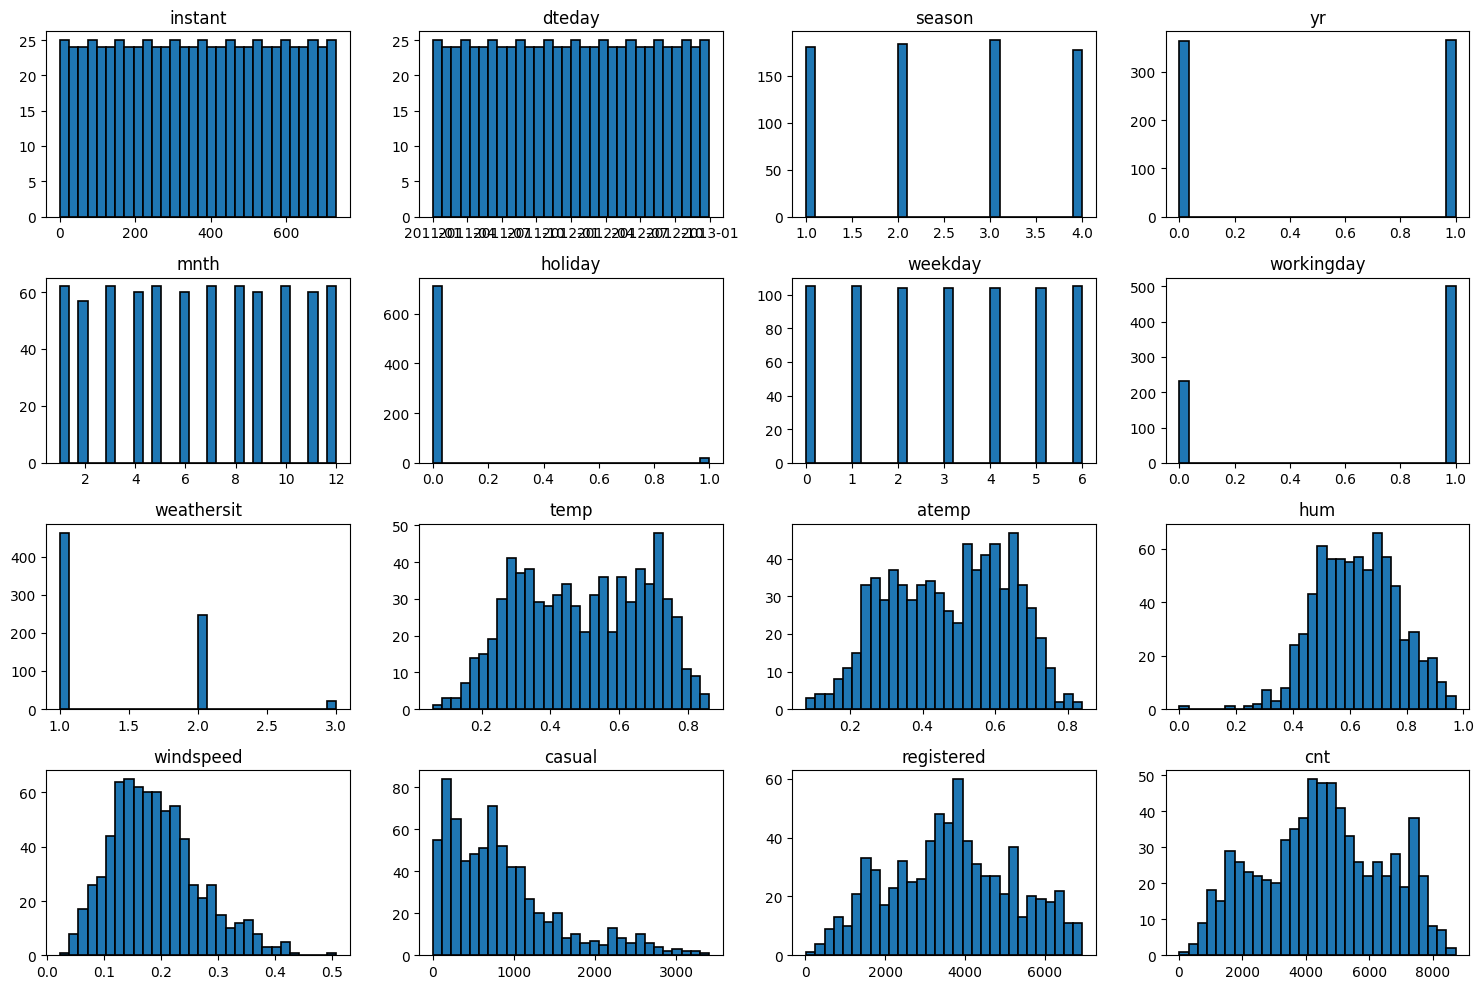

In [17]:
plt.figure(figsize=(15, 10))
data_day.hist(bins=30, edgecolor='black', linewidth=1.2, grid=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [18]:
# Rata-rata dan jumlah penyewaan perjam
hourly_analysis = data_hour.groupby('hr')['cnt'].agg(['mean', 'sum']).rename(
    columns={"mean": "average_rentals", "sum": "total_rentals"}
).sort_values(by='average_rentals', ascending=False)

hourly_analysis.head()

,average_rentals,total_rentals
hr,,
17,461.452055,336860
18,425.510989,309772
8,359.011004,261001
16,311.983562,227748
19,311.523352,226789


Insight: 
- Rata-rata dan total penyewaan sepeda paling banyak terjadi di jam 17 dan jam 18

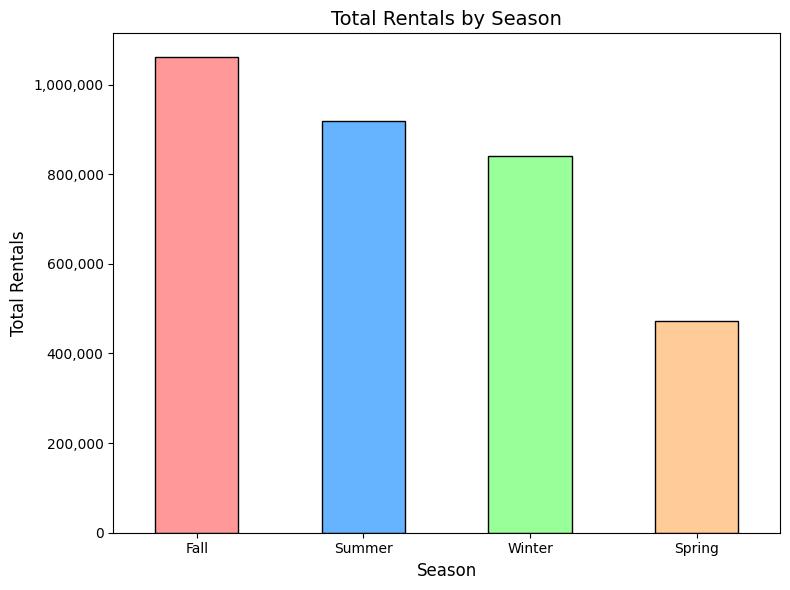

In [19]:
# 1. Total Rentals by Season
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
data_day['season_label'] = data_day['season'].map(season_labels)
season_totals = data_day.groupby('season_label')['cnt'].sum().sort_values(ascending=False)
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'] 

plt.figure(figsize=(8, 6))
season_totals.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Total Rentals by Season', fontsize=14)
plt.ylabel('Total Rentals', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}')) 
plt.tight_layout()
plt.show()


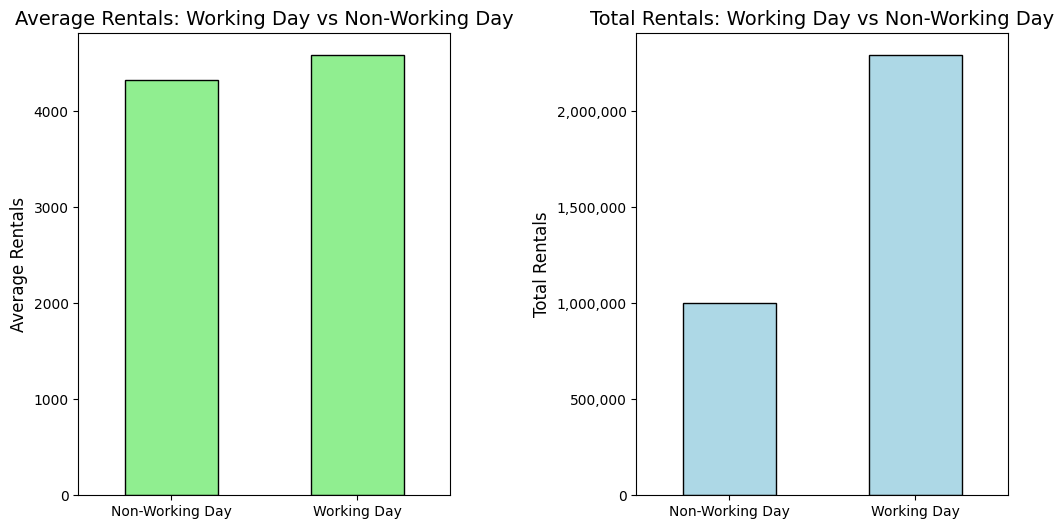

In [20]:
# 2. Rata-rata dan Total Rental: Working Day vs Non-Working Day
workingday_labels = {0: 'Non-Working Day', 1: 'Working Day'}
data_day['workingday_label'] = data_day['workingday'].map(workingday_labels)

workingday_averages = data_day.groupby('workingday_label')['cnt'].mean()
workingday_totals = data_day.groupby('workingday_label')['cnt'].sum()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

workingday_averages.plot(kind='bar', color='lightgreen', edgecolor='black', ax=ax[0])
ax[0].set_title('Average Rentals: Working Day vs Non-Working Day', fontsize=14)
ax[0].set_ylabel('Average Rentals', fontsize=12)
ax[0].set_xlabel(None)
ax[0].set_xticklabels(workingday_averages.index, rotation=0)

workingday_totals.plot(kind='bar', color='lightblue', edgecolor='black', ax=ax[1])
ax[1].set_title('Total Rentals: Working Day vs Non-Working Day', fontsize=14)
ax[1].set_ylabel('Total Rentals', fontsize=12)
ax[1].set_xlabel(None)
ax[1].set_xticklabels(workingday_totals.index, rotation=0)
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}')) 
plt.subplots_adjust(wspace=0.5) 


plt.show()

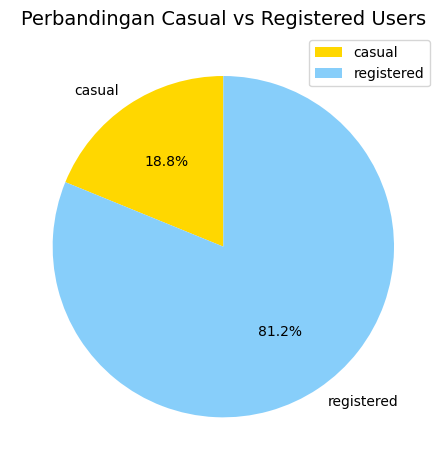

In [21]:
# 3. Perbandingan user casual & registered
user_totals = data_day[['casual', 'registered']].sum()
user_totals.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'],legend=['Casual', 'Registered'])
plt.title('Perbandingan Casual vs Registered Users', fontsize=14)
plt.ylabel('') 
plt.tight_layout()
plt.show()

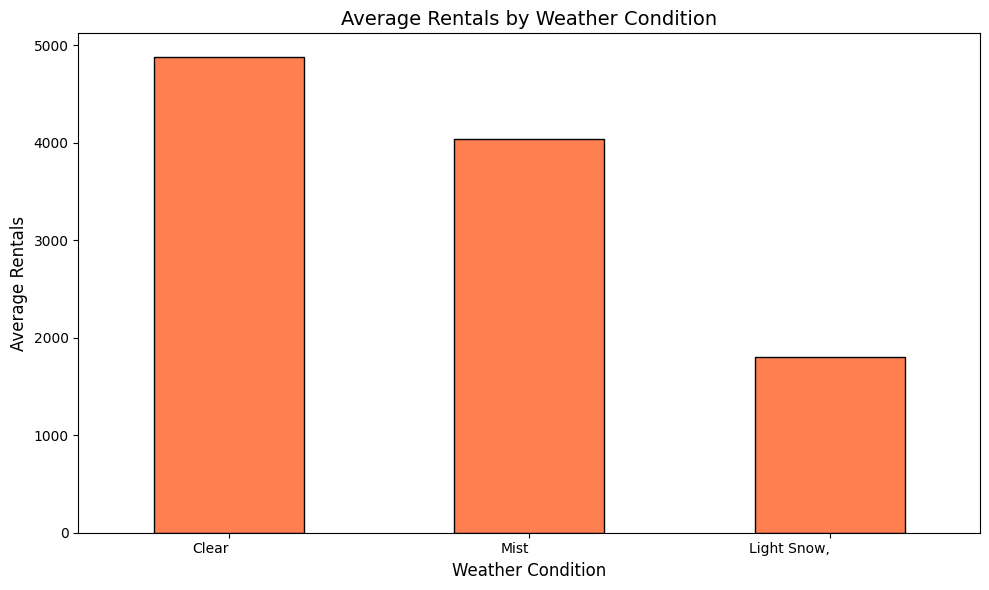

In [22]:
# 4. Rata-rata cnt terhadap weathersit
weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow,',
    4: 'Heavy Rain'
}

weather_totals = data_day.groupby('weathersit')['cnt'].mean()
weather_totals.index = weather_totals.index.map(weather_map)

plt.figure(figsize=(10, 6))
weather_totals.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Rentals by Weather Condition', fontsize=14)
plt.ylabel('Average Rentals', fontsize=12)
plt.xlabel('Weather Condition', fontsize=12)
plt.xticks(rotation=0, ha='right') 
plt.tight_layout()
plt.show()

In [23]:
# 5. pivot table untuk mencari penyewaan perbulan tertinggi dari tahun dan season
year_map = {0: 2011, 1: 2012}
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

pivot_analysis = data_day.pivot_table(
    values='cnt', 
    index=['yr', 'season'], 
    columns='mnth', 
    aggfunc='sum'
)

max_rentals_by_season = pivot_analysis.idxmax(axis=1).reset_index(name='Month with Highest Rentals')
max_rentals_by_season['yr'] = max_rentals_by_season['yr'].map(year_map)
max_rentals_by_season['season'] = max_rentals_by_season['season'].map(season_map)

max_rentals_by_season.columns = ['Year', 'Season', 'Month with Highest Rentals']

print(max_rentals_by_season)

   Year  Season  Month with Highest Rentals
0  2011  Spring                           2
1  2011  Summer                           5
2  2011    Fall                           7
3  2011  Winter                          10
4  2012  Spring                           2
5  2012  Summer                           5
6  2012    Fall                           8
7  2012  Winter                          10


Insight : 
- Season Spring Pada tahun 2011 dan 2012, bulan dengan penyewaan tertinggi adalah bulan Februari (2)

- Season Summer dengan penyewaan tertinggi untuk musim panas adalah bulan Mei (5) pada tahun 2011 dan 2012. 

- Season Fall Pada tahun 2011, bulan dengan penyewaan tertinggi adalah bulan Juli (7), sedangkan pada tahun 2012 adalah bulan Agustus (8).

- Season Winter Bulan dengan penyewaan tertinggi pada adalah bulan Oktober (10) untuk kedua tahun.

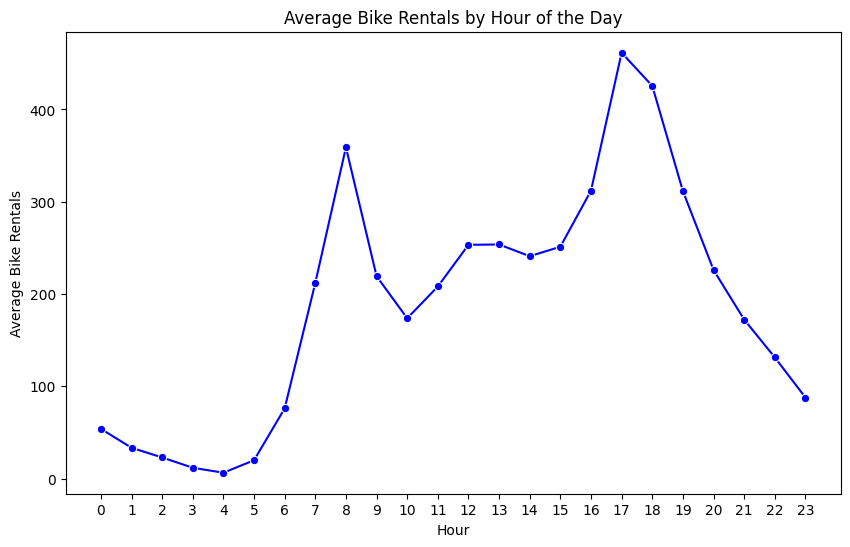

In [34]:
# 6. Rata-rata Penyewaan per Jam
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_hour, x='hr', y='cnt', estimator='mean', ci=None, color="blue", marker = 'o')
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Bike Rentals')
plt.xticks(range(0, 24))
plt.show()

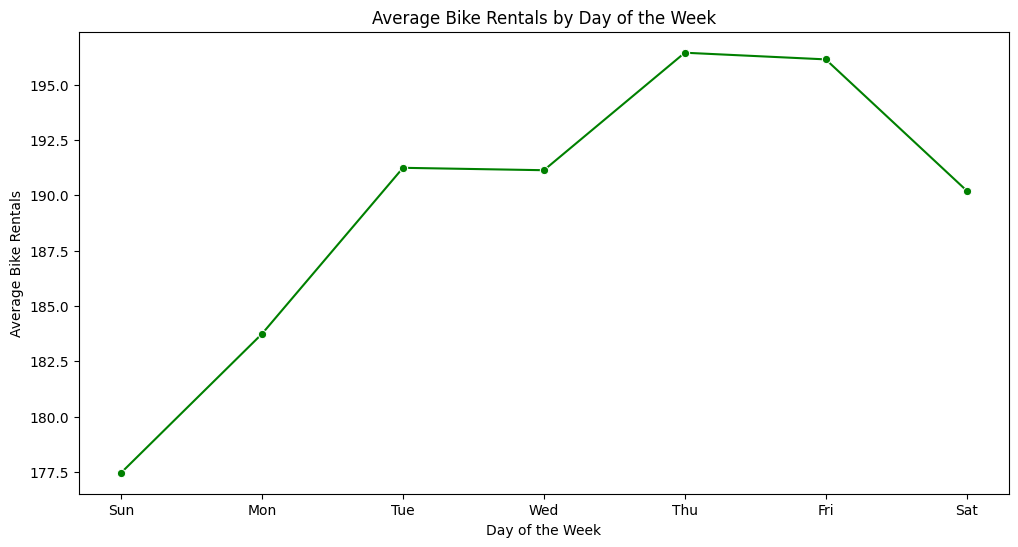

In [25]:
# 7. Rata-rata Penyewaan per Hari dalam Seminggu
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_hour, x='weekday', y='cnt', estimator='mean', ci=None, marker='o', color="green")
plt.title('Average Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Bike Rentals')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()

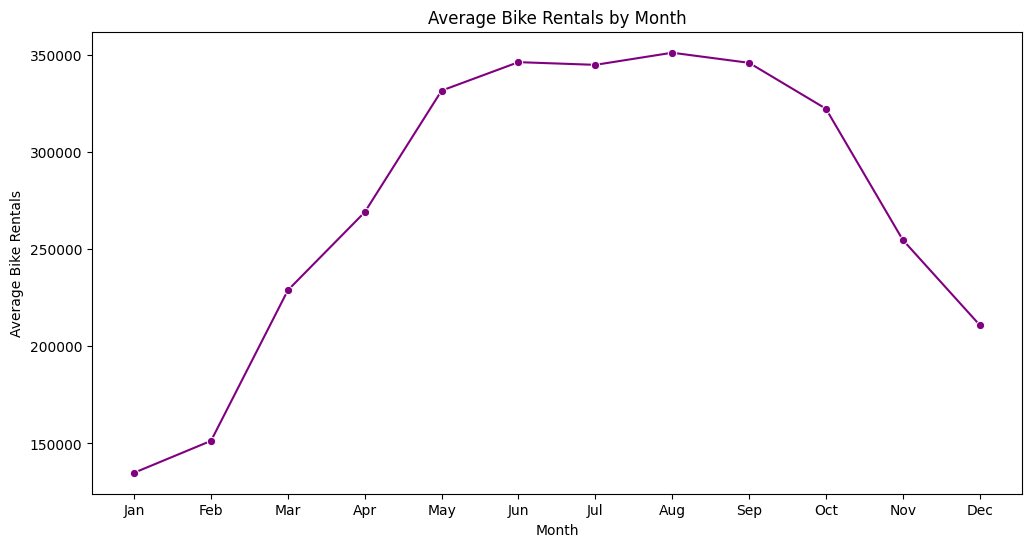

In [26]:
# 8. Rata-rata Jumlah Penyewaan per Bulan
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_hour, x='mnth', y='cnt', estimator='sum', ci=None, marker='o', color="purple")
plt.title('Average Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Insight: 
1. **Musim dengan Penyewaan Tertinggi**: Musim panas (summer) dan musim gugur (fall) memiliki total penyewaan tertinggi.

2. **Perbandingan rata-rata dan total Rental sepeda pada Working days vs Non-Working days** : Working day memiliki rata-rata penyewaan lebih tinggi dibandingkan Non-Working day,

3. **User Registered vs User Casual** : User Registered mendominasi dibandingkan user Casual pada Rental Sepeda

4. **Pengaruh Cuaca terhadap Jumlah Rental sepeda** : penyewaan lebih banyak pada saat kondisi cuaca clear atau cerah 

5. **Penyewaan perbulan tertinggi dari tahun dan season**
    - Season Spring Pada tahun 2011 dan 2012, bulan dengan penyewaan tertinggi adalah bulan Februari (2)

    - Season Summer dengan penyewaan tertinggi untuk musim panas adalah bulan Mei (5) pada tahun 2011 dan 2012. 

    - Season Fall Pada tahun 2011, bulan dengan penyewaan tertinggi adalah bulan Juli (7), sedangkan pada tahun 2012 adalah bulan Agustus (8).

    - Season Winter Bulan dengan penyewaan tertinggi pada adalah bulan Oktober (10) untuk kedua tahun.

5.  **Penyewaan per jam** : Rental Sepeda paling banyak pada jam 8.00 dan jam 17.00

6. **Rata-rata Penyewaan per Hari dalam Seminggu** : Rata-rata Rental Sepeda paling banyak terjadi pada Thursday dan Friday

7. **Rata-rata Penyewaan per Bulan** : Rental sepeda paling banyak terjadi saat Bulan Agustus dan September
 

# Visualization & Explanatory Analysis

**Pertanyaan 1** : Bagaimana pola penggunaan sepeda berdasarkan musim dan waktu dalam sehari?

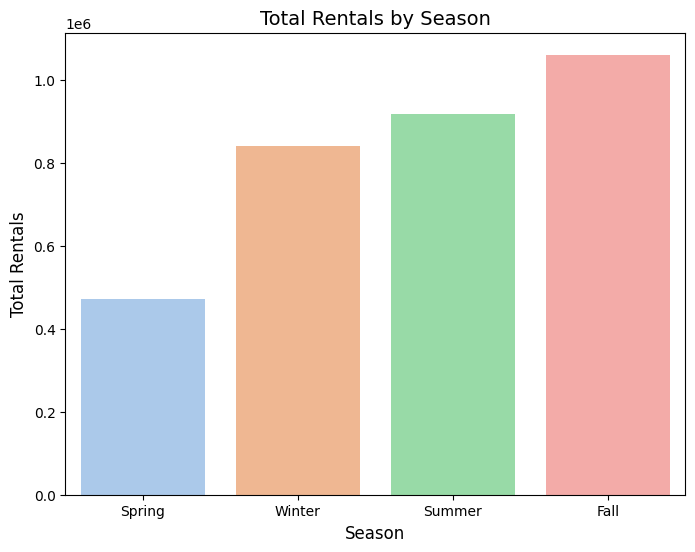

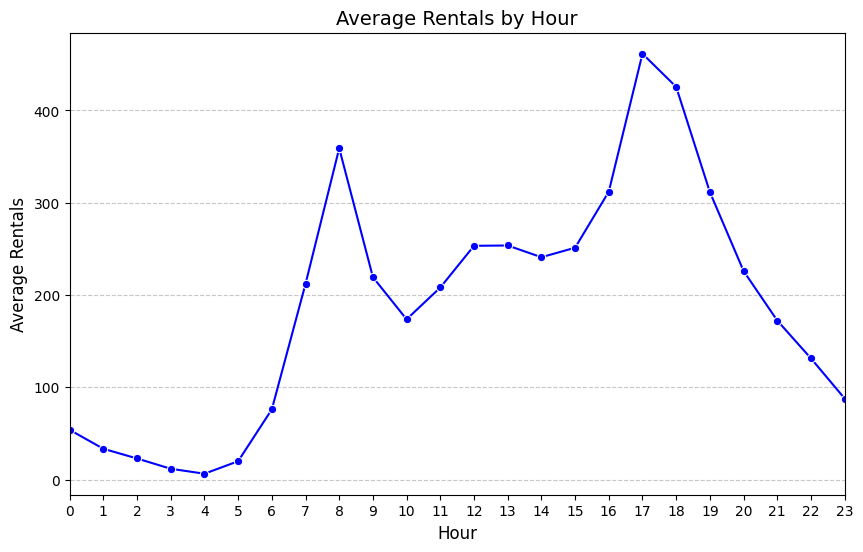

In [ ]:
# 1. Total Penyewaan Berdasarkan Musim
season_data = (
    data_day.groupby('season')['cnt']
    .sum()
    .rename(index={1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
    .sort_values()
)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(
    x=season_data.index,
    y=season_data.values,
    palette="pastel",
    ax=ax
)
ax.set_title("Total Rentals by Season", fontsize=14)
ax.set_xlabel("Season", fontsize=12)
ax.set_ylabel("Total Rentals", fontsize=12)
ax.tick_params(axis='x', rotation=0)
plt.show()

# 2. Rata-Rata Penyewaan Berdasarkan Waktu dalam Sehari
hourly_avg = data_hour.groupby('hr')['cnt'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o', color="blue", ax=ax)
ax.set_title("Average Rentals by Hour", fontsize=14)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Average Rentals", fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xlim(0, 23)
ax.set_xticks(range(0, 24))
plt.show()


**Pertanyaan 2** : Bagaimana perbandingan jumlah penyewaan sepeda antara hari kerja dan hari libur, termasuk distribusi pengguna kasual dan terdaftar?

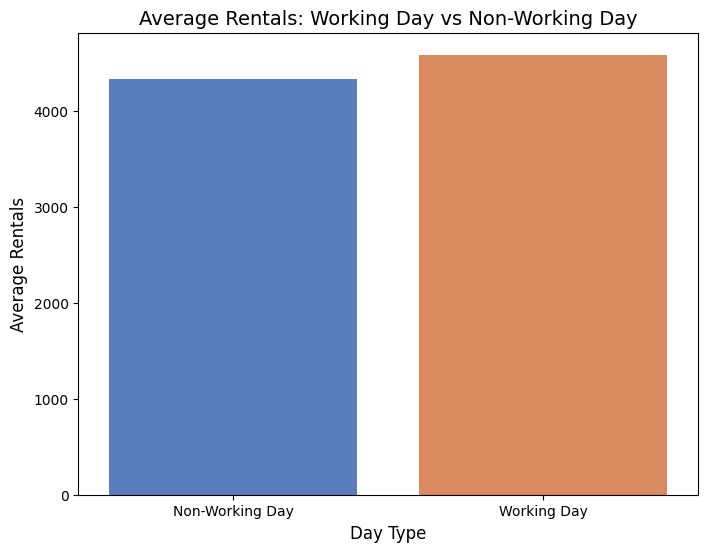

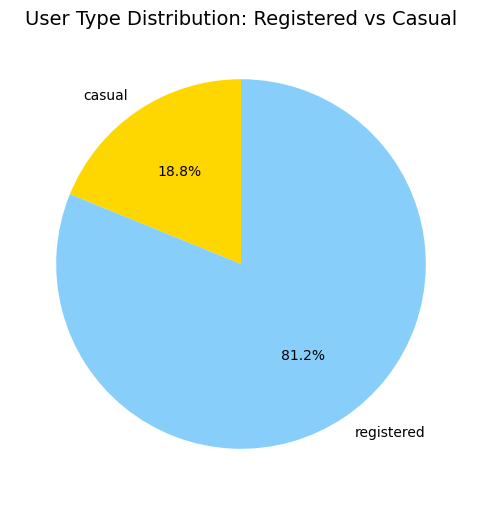

In [ ]:
# 1. Rata-Rata Penyewaan: Hari Kerja vs Hari Libur
workingday_avg = data_day.groupby('workingday')['cnt'].mean()
workingday_avg.index = ['Non-Working Day', 'Working Day']

plt.figure(figsize=(8, 6))
sns.barplot(
    x=workingday_avg.index,
    y=workingday_avg.values,
    palette="muted"
)
plt.title("Average Rentals: Working Day vs Non-Working Day", fontsize=14)
plt.xlabel("Day Type", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)
plt.xticks(rotation=0)
plt.show()

# 2. Distribusi Pengguna Terdaftar vs Kasual
user_totals = data_day[['casual', 'registered']].sum()

plt.figure(figsize=(6, 6))
user_totals.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
plt.title("User Type Distribution: Registered vs Casual", fontsize=14)
plt.ylabel("")
plt.show()


Insight:
1. **Pertanyaan 1** : 
- Sewa terbanyak pada saat musim panas(Summer) dan musim gugur(Fall). Cuaca hangat pada musim panas dan musim gugur mendukung aktivitas luar ruangan seperti bersepeda.

- Puncak penggunaan pada jam sibuk (08.00 dan 17.00) menunjukkan sepeda sering digunakan sebagai moda transportasi kerja.

2. **Pertanyaan 2** : 
- Grafik batang menunjukkan rata-rata penyewaan pada hari kerja lebih tinggi dibandingkan hari libur.

- Pie chart menunjukkan mayoritas penyewaan berasal dari pengguna terdaftar (registered), terutama pada hari kerja.

# RFM Analysis


In [ ]:
rfm_data = data_day[['dteday', 'casual', 'registered', 'cnt']].copy()

snapshot_date = rfm_data['dteday'].max() + pd.Timedelta(days=1)

rfm_table = rfm_data.groupby('dteday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

# Recency
rfm_table['Recency'] = (snapshot_date - rfm_table['dteday']).dt.days

# Frequency
rfm_table['Frequency'] = rfm_table['casual'] + rfm_table['registered']

# Monetary
rfm_table['Monetary'] = rfm_table['cnt']

rfm_summary = rfm_table[['dteday', 'Recency', 'Frequency', 'Monetary']].head()
rfm_summary

,dteday,Recency,Frequency,Monetary
0,2011-01-01,731,985,985
1,2011-01-02,730,801,801
2,2011-01-03,729,1349,1349
3,2011-01-04,728,1562,1562
4,2011-01-05,727,1600,1600


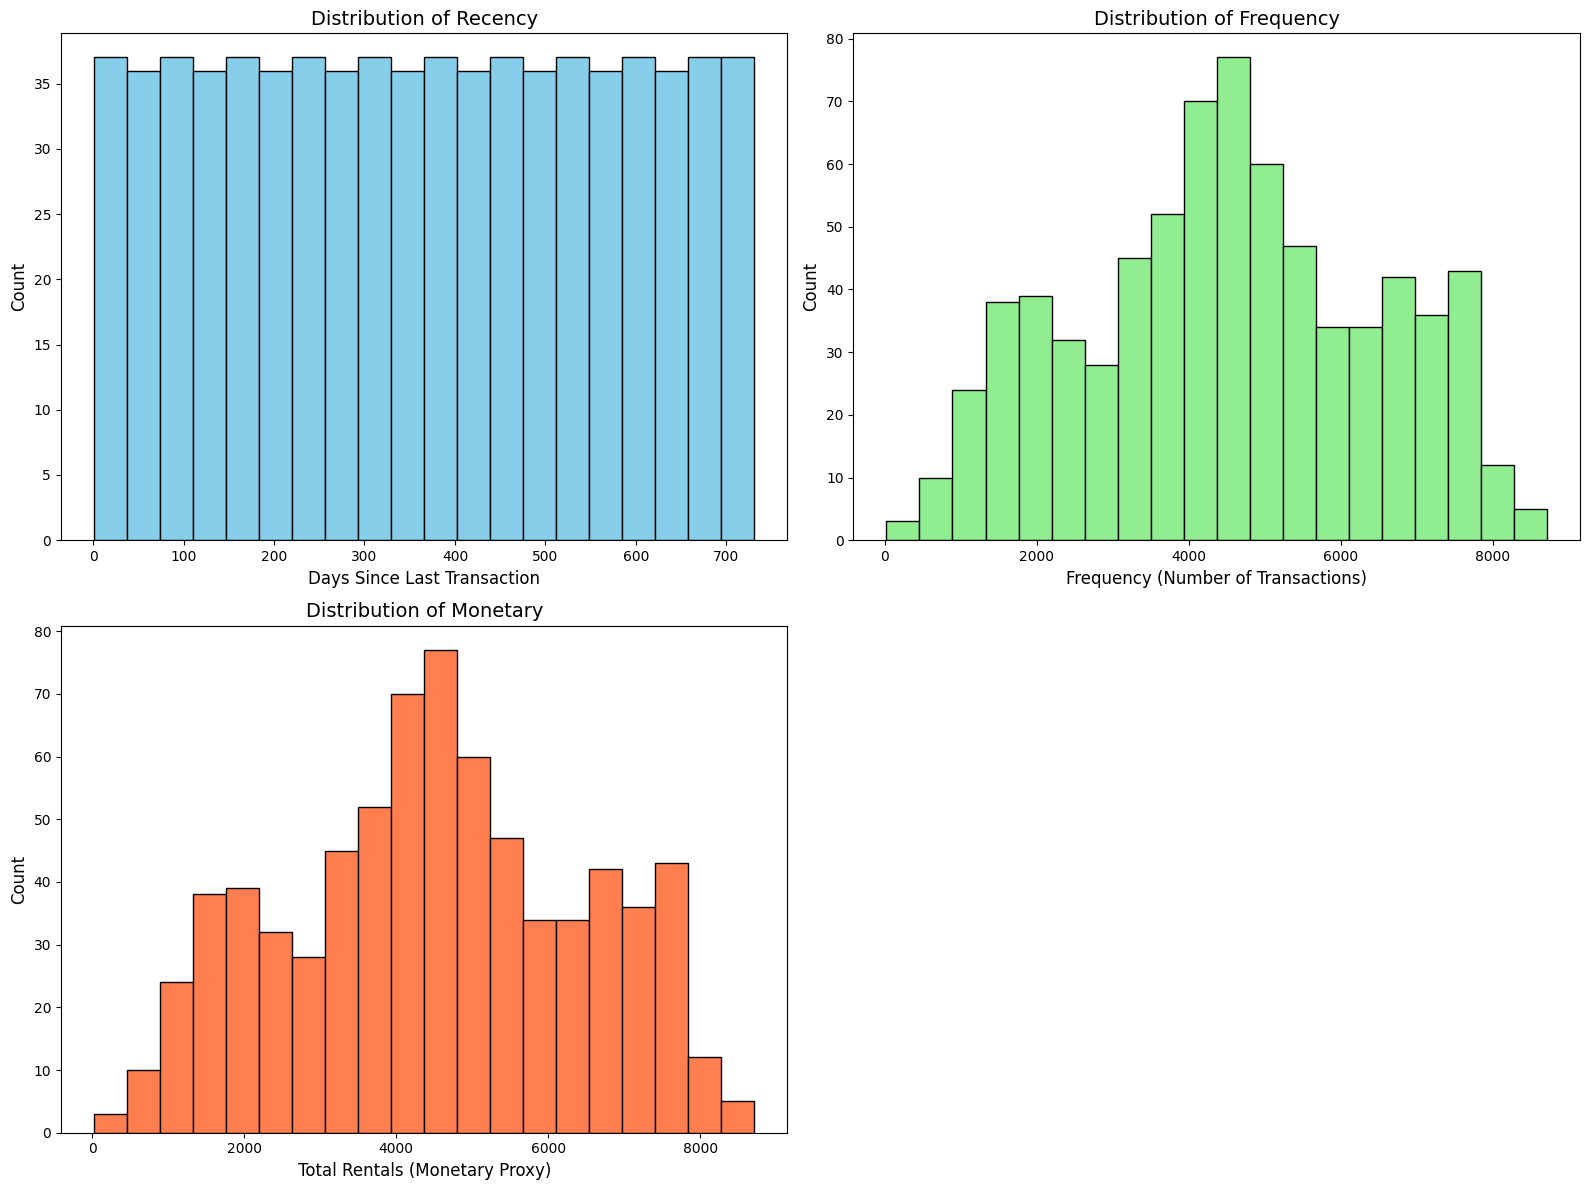

In [30]:
plt.figure(figsize=(16, 12))

# Recency
plt.subplot(2, 2, 1)
plt.hist(rfm_table['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Recency', fontsize=14)
plt.xlabel('Days Since Last Transaction', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Frequency
plt.subplot(2, 2, 2)
plt.hist(rfm_table['Frequency'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Frequency', fontsize=14)
plt.xlabel('Frequency (Number of Transactions)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Monetary
plt.subplot(2, 2, 3)
plt.hist(rfm_table['Monetary'], bins=20, color='coral', edgecolor='black')
plt.title('Distribution of Monetary', fontsize=14)
plt.xlabel('Total Rentals (Monetary Proxy)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Insight :
- **Recency** : Sebagian besar transaksi terakhir terjadi dalam periode waktu yang relatif dekat dari tanggal analisis, menunjukkan aktivitas pengguna yang konsisten.

- **Frequency** : Pengguna dengan nilai Frequency tinggi (misalnya, >15 transaksi) cenderung adalah pengguna terdaftar yang menggunakan sepeda sebagai moda transportasi utama.

- **Monetary** : Pengguna dengan nilai Monetary tinggi berkontribusi signifikan terhadap pendapatan. Mereka kemungkinan besar adalah pengguna terdaftar yang melakukan penyewaan dengan frekuensi tinggi.

# Conclusion

**Conclusion Pertanyaan 1** :
- Musim panas (summer) dan gugur (fall) memiliki total penyewaan tertinggi. Hal ini disebabkan oleh cuaca yang hangat dan mendukung aktivitas luar ruangan. Sebaliknya, musim dingin (winter) memiliki total penyewaan paling rendah, yang kemungkinan besar disebabkan oleh cuaca dingin dan kurangnya minat untuk bersepeda. 
- Penyewaan sepeda mencapai puncaknya pada pukul 08.00 dan 17.00, menunjukkan penggunaan sepeda untuk transportasi kerja.
Di luar jam sibuk, penggunaan sepeda menurun drastis, terutama pada malam hari.


Conclusion pertanyaan 2: 
- Hari kerja memiliki rata-rata penyewaan lebih tinggi dibandingkan hari libur.
- Pengguna terdaftar menyumbang mayoritas penyewaan sepeda secara keseluruhan, menunjukkan basis pelanggan yang kuat di kalangan pengguna tetap.
Pengguna kasual memiliki proporsi yang lebih kecil tetapi berkontribusi signifikan pada akhir pekan dan hari libur.